In [18]:
import sys
sys.path.insert(0, '../lucid')

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import lucid_video as L
import common as C
import tensorflow as tf

import lucid.optvis.render as render
import matplotlib.pyplot as plt

import numpy as np

In [41]:
def compute_c3d_acts(vid):
    model = L.I3D()
    model.load_graphdef()

    layers = [ l.name for l in model.layers ] 

    acts = {}

    with tf.Graph().as_default(), tf.Session():
        t_input = tf.placeholder_with_default(tf.to_float(vid), [None, None, None, 3])
        T = render.import_model(model, t_input, t_input)
        for layer in L.tqdm(layers):
            k = layer.split('/')[1].lower().replace('_', '')
            acts[k] = T(layer).eval()

    return acts

def compute_c2d_acts(img): 
    model = models.InceptionV1()
    model.load_graphdef()

    layers = [ l.name for l in model.layers ] 
    acts = {}

    with tf.Graph().as_default(), tf.Session():
        t_input =  tf.placeholder_with_default(tf.to_float(img), [None, None, 3])
        T = render.import_model(model, t_input, t_input)
        for layer in L.tqdm(layers):
            acts[layer] = T(layer).eval()
    
    return acts
    c2d_acts = acts.copy()
    
vid = C.file_to_array(C.cricket_video)

c3d_acts = compute_c3d_acts(vid)
c2d_acts = compute_c2d_acts(vid[0])


In [54]:


vid_single_frame =  np.stack([ vid[0] for _ in range(vid.shape[0])])

c3d_acts_single_frame = compute_c3d_acts(vid_single_frame)
 

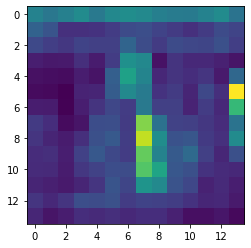

In [45]:
plt.imshow(c2d_acts['mixed4b'][0].mean(axis=-1))

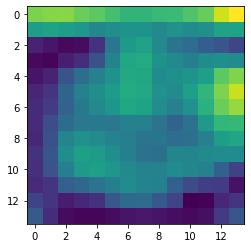

In [50]:
plt.imshow(c3d_acts['mixed4b'][0].mean(axis=-1).mean(0))

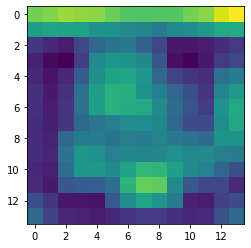

In [55]:
plt.imshow(c3d_acts_single_frame['mixed4b'][0].mean(-1).mean(0))